In [5]:
r = 102317135

ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

ar, br


(0.2, 0.3)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv", encoding='latin1')
x = df["no2"].dropna().values

/tmp/ipython-input-1415777100.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding='latin1')


In [10]:
z = x + ar * np.sin(br * x)

In [11]:
mu = np.mean(z)
sigma_sq = np.var(z)

lam = 1 / (2 * sigma_sq)
c = np.sqrt(lam / np.pi)

mu, lam, c


(np.float64(25.80277171419891),
 np.float64(0.0014601849203202159),
 np.float64(0.02155901889684258))

In [12]:
def pdf_hat(z, mu, lam, c):
    return c * np.exp(-lam * (z - mu)**2)


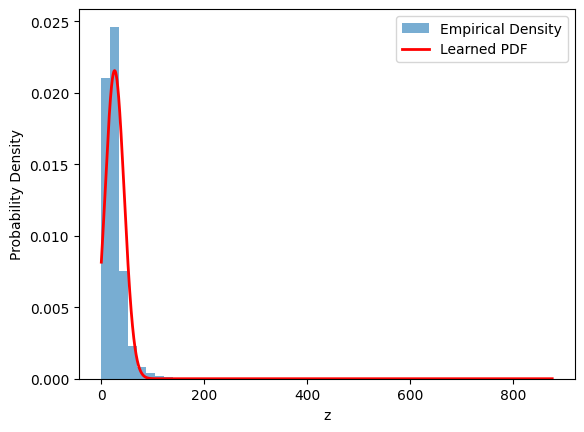

In [13]:
z_sorted = np.sort(z)
p_z = pdf_hat(z_sorted, mu, lam, c)

plt.hist(z, bins=50, density=True, alpha=0.6, label="Empirical Density")
plt.plot(z_sorted, p_z, color="red", linewidth=2, label="Learned PDF")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


In [14]:
print("μ =", mu)
print("λ =", lam)
print("c =", c)

μ = 25.80277171419891
λ = 0.0014601849203202159
c = 0.02155901889684258
